In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import datasets


In [48]:
df = datasets.fetch_california_housing()

In [81]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [53]:
housing_df = pd.DataFrame(df.data, columns=df.feature_names)

In [57]:
housing_df['MedHouseVal'] = df.target

In [80]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<AxesSubplot: >

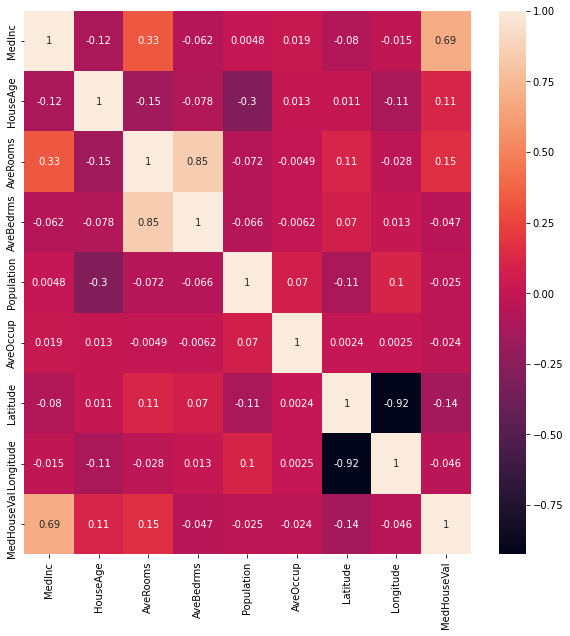

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(housing_df.corr(), annot= True)

<AxesSubplot: xlabel='MedInc', ylabel='MedHouseVal'>

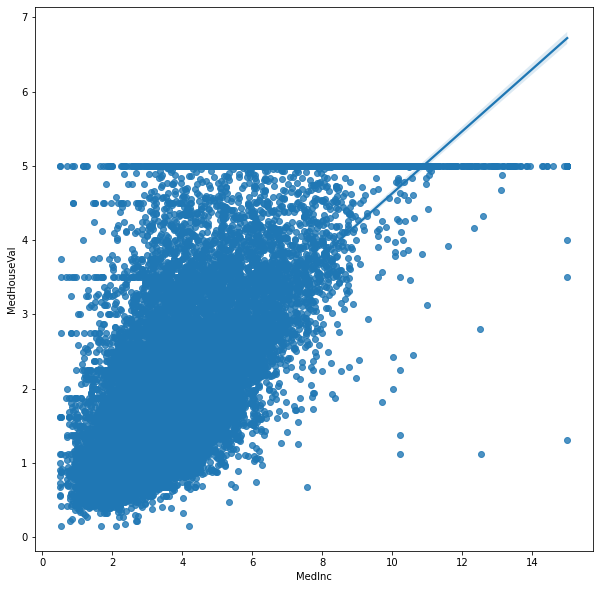

In [77]:
plt.figure(figsize=(10,10))
sns.regplot(housing_df, x= housing_df[['MedInc']], y = housing_df['MedHouseVal'])

<AxesSubplot: xlabel='HouseAge', ylabel='MedHouseVal'>

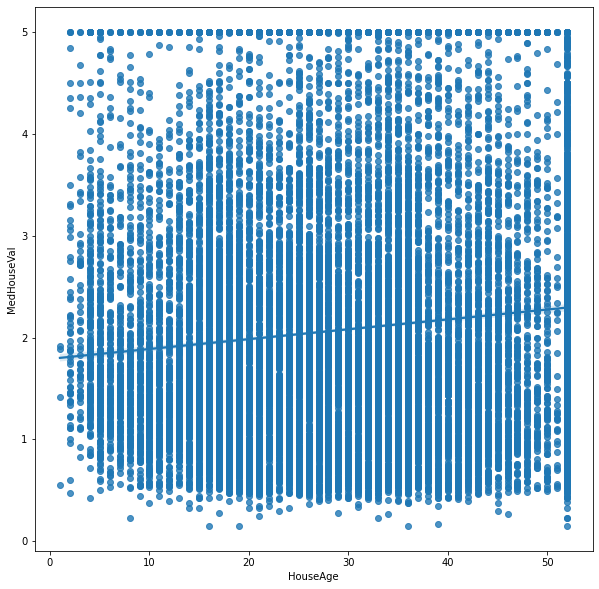

In [78]:
plt.figure(figsize=(10,10))
sns.regplot(housing_df, x= housing_df[['HouseAge']], y = housing_df['MedHouseVal'])

<AxesSubplot: xlabel='AveRooms', ylabel='MedHouseVal'>

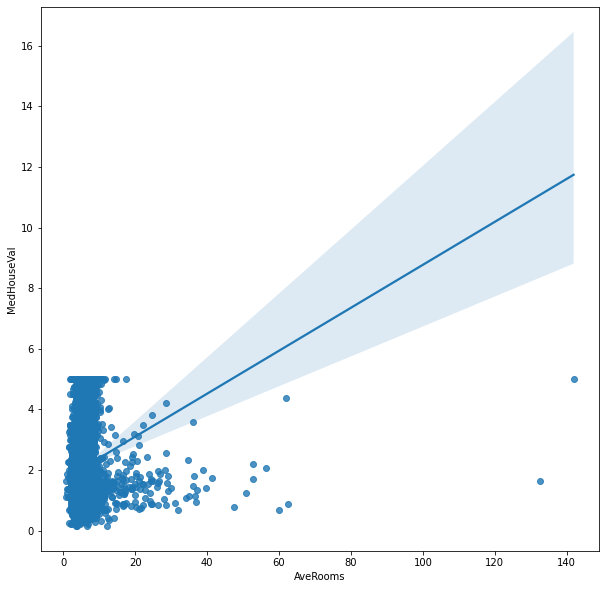

In [79]:
plt.figure(figsize=(10,10))
sns.regplot(housing_df, x= housing_df[['AveRooms']], y = housing_df['MedHouseVal'])

In [83]:
X = housing_df.drop('MedHouseVal', axis = 1)
y = housing_df['MedHouseVal']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2, test_size=0.2)

In [86]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [88]:
from sklearn import metrics


score = metrics.r2_score(y_true=y_train, y_pred=xgb.predict(X_train))

In [89]:
score

0.9451221492760822

In [90]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [93]:
score2 = metrics.r2_score(y_true=y_train, y_pred=lr.predict(X_train))

In [94]:
score2

0.6068205998456941

In [96]:
score3 = metrics.r2_score(y_true=y_test, y_pred=xgb.predict(X_test))
score3

0.8412904408180302

In [97]:
score3 = metrics.r2_score(y_true=y_test, y_pred=lr.predict(X_test))
score3

0.601385327205515

In [105]:
results = xgb.predict(X_test)